In [1]:
import torch
from torch.utils.data import Dataset
from binconvfm.models.lstm import LSTMForecaster
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
class Seq2SeqDataset(Dataset):
    def __init__(self, seq, input_len=24, output_len=5):
        self.input_len = input_len
        self.output_len = output_len
        self.seq = torch.tensor(seq, dtype=torch.float32)
        self.length = len(seq) - input_len - output_len + 1

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        input_seq = self.seq[idx : idx + self.input_len]
        target_seq = self.seq[idx + self.input_len : idx + self.input_len + self.output_len]
        return input_seq, self.output_len, target_seq

In [3]:
x_space = np.linspace(0, 100, 1000)
seq = np.sin(x_space) + np.random.randn(1000)*0.1

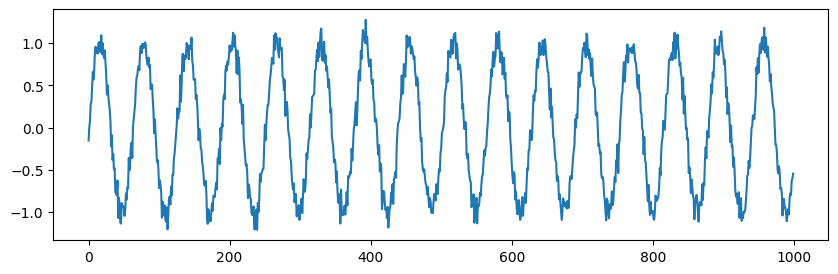

In [4]:
plt.figure(figsize=(10, 3))
plt.plot(seq)
plt.show()

In [5]:
input_len = 24
output_len = 5

train_dataset = Seq2SeqDataset(seq)
val_dataset = Seq2SeqDataset(seq)
test_dataset = Seq2SeqDataset(seq)

In [6]:
model = LSTMForecaster(input_len, output_len, hidden_dim=64, num_epochs=2)
model.fit(train_dataset, val_dataset)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /Users/vitaliypozdnyakov/Yandex.Disk.localized/Data Science/binconvfm/notebooks/checkpoints exists and is not empty.

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | LSTM | 34.4 K | train
---------------------------------------
34.4 K    Trainable params
0         Non-trainable params
34.

Sanity Checking: |                                                                                            …

/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=2` reached.


In [7]:
model.evaluate(test_dataset)

/Users/vitaliypozdnyakov/miniconda3/envs/binconv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          crps              0.07219097018241882
          mase              1.5557883977890015
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'mase': 1.5557883977890015, 'crps': 0.07219097018241882}]

In [11]:
pred = model.predict(test_dataset)
pred[0].shape

Predicting: |                                                                                                 …

torch.Size([972, 1000, 5])